In [1]:
import torch
import torch.nn as nn
import numpy as np

# nn1

In [2]:
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split   

In [3]:
iris = datasets.load_iris()
print(iris['data'][::15])

[[5.1 3.5 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [5.  2.  3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 3.  6.1 2.3]]


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris['target'][::15])

[0 0 0 0 1 1 1 2 2 2]


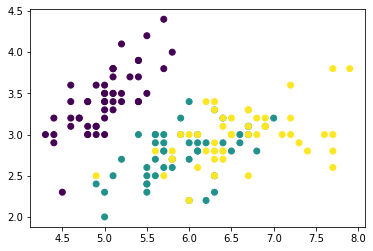

In [6]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c = iris['target'])

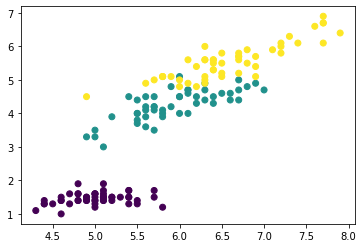

In [7]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 2], c = iris['target'])

In [8]:
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=seed)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [11]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [12]:
class fc_iris_net(nn.Module):
    def __init__(self,
                 n_input = 4,
                 n_hidden = 2,
                 n_out = 3):

        super(fc_iris_net, self).__init__()

        self.fc1 = nn.Linear(n_input, n_hidden)
        self.activ1 = nn.Sigmoid()
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.activ2 = nn.Tanh()
        self.fc3 = nn.Linear(n_hidden, n_out)
        self.sm = nn.Softmax(dim=1)

    def forward(self, data_input):
        x = self.fc1(data_input)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, data_input):
        with torch.no_grad():
            x = self.forward(data_input)
            x = self.sm(x)
        return x

In [13]:
iris_net = fc_iris_net(n_input=4,
                       n_hidden=3,
                       n_out=3)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=iris_net.parameters(),
                             lr=1.0e-3)

In [14]:
np.random.permutation(15)

array([ 7, 10,  4,  0,  5,  9,  8, 11,  3,  1,  6, 12,  2, 13, 14])

In [15]:
batch_size = 5
epochs = 150

for epoch in range(epochs):
    # В каждой эпохе зададим случайный порядок обхода датасета
    order = np.random.permutation(len(X_train))
    # Итерируемся по порядку обхода с заданным шагом в batch_size
    for start_index in range(0, len(X_train), batch_size):
        
        # На всех тензорах, ассоциированных с оптимизатором, задаём нулевой градиент
        optimizer.zero_grad()

        # Находим индексы строчек данных для пропуска через нейронную сеть
        batch_indexes = order[start_index:start_index+batch_size]

        # Выделяем пакет данных для пропуска через нейронную сеть
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        # Методом forward нейронной сети получаем ответ в виде модельных значений
        preds = iris_net.forward(x_batch)

        # Считаем ошибку между ответом модели и реальными данными
        loss_value = loss(preds, y_batch)

        # Для всех тензоров, участвовавших в вычислении с requires_grad=True
        # вычисляем градиент и складируем в качестве значений производной
        loss_value.backward()

        # Производим шаг оптимизатора, изменяя вес по правилу
        optimizer.step()

    # На каждой 5-ой эпохе смотрим качество модели на тесте
    if epoch % 5 == 0:
        test_preds = iris_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.2105)
tensor(0.2105)
tensor(0.2105)
tensor(0.2105)
tensor(0.4737)
tensor(0.6316)
tensor(0.6316)
tensor(0.6316)
tensor(0.6316)
tensor(0.7895)
tensor(0.9737)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9474)
tensor(0.9474)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9474)


# nn2

In [16]:
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split   

In [17]:
net_options = {"seed": 122,
               "test_size": 0.25,
               "n_hidden": 6,
               "batch_size": 3,
               "epochs": 400,
               "lr": 0.0002}

In [18]:
seed = net_options['seed']
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [19]:
class fc_net(nn.Module):
    def __init__(self,
                 n_input = 4,
                 n_hidden = 3,
                 n_out = 3):

        super(fc_net, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden)
        self.activ1 = nn.Sigmoid()
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.activ2 = nn.Sigmoid()
        self.fc3 = nn.Linear(n_hidden, n_out)
        self.sm = nn.Softmax(dim=1)

    def forward(self, data_input):
        x = self.fc1(data_input)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, data_input):
        with torch.no_grad():
            x = self.forward(data_input)
            x = self.sm(x)
        return x

In [20]:
cancer = datasets.load_breast_cancer()
print(cancer['data'][:5])
print(cancer['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=seed)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [21]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [22]:
FCnet = fc_net(n_input=cancer['data'].shape[1],
               n_hidden=net_options['n_hidden'],
               n_out=2)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=FCnet.parameters(),
                             lr=net_options['lr'])

tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.8881)
tensor(0.9091)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.9091)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9161)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.8951)
tensor(0.9021)
tensor(0.9091)
tensor(0.9021)
tensor(0.9021)
tensor(0.9161)
tensor(0.8951)
tensor(0.9021)
tensor(0.8951)
tensor(0.9161)
tensor(0.9021)
tensor(0.9091)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9091)
tensor(0.9

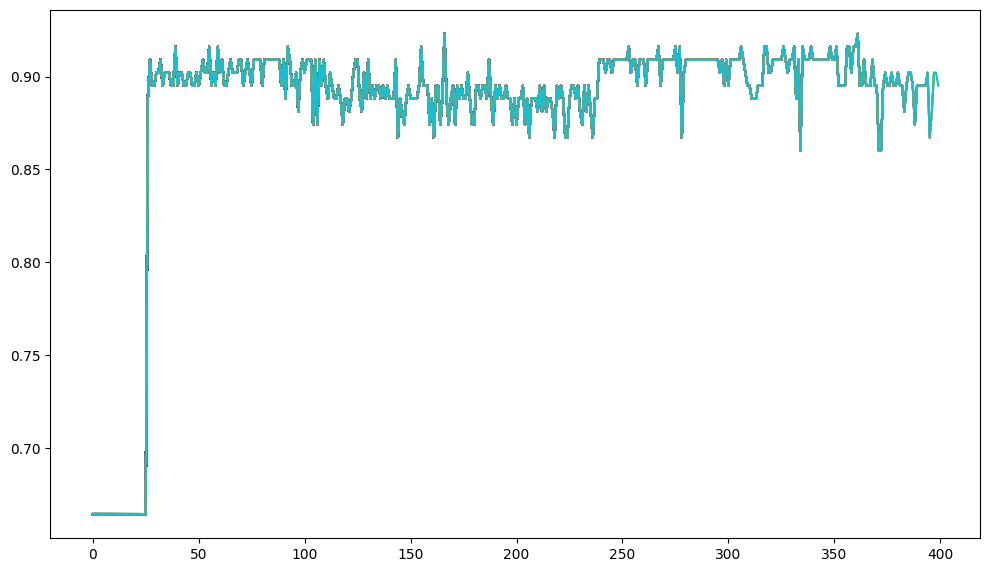

In [23]:
batch_size = net_options['batch_size']
epochs = net_options['epochs']

test_losses = []
plt.figure(figsize=(12, 7), dpi=100)
plt.xlim = (0, epochs)
plt.ylim = (0, 1)

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = FCnet.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = FCnet.forward(X_test)
    test_preds = test_preds.argmax(dim=1)
    test_losses.append((test_preds == y_test).float().mean())
    plt.plot(list(range(epoch + 1)), test_losses)
    print((test_preds == y_test).float().mean())

# nn3

In [24]:
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split   

In [25]:
net_options = {"seed": 121,
               "test_size": 0.25,
               "n_hidden": 8,
               "batch_size": 1,
               "epochs": 200,
               "lr": 0.001}

seed = net_options['seed']
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

data = datasets.load_diabetes()
print("Data:\n")
print(data['data'][:5])
print("\nTargets:\n")
print(data['target'][:5])
print("\nColnames\n:")
print(data['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(data['data'],
                                                    data['target'],
                                                    test_size=net_options['test_size'],
                                                    shuffle=True,
                                                    random_state=seed)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Data:

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]

Targets:

[151.  75. 141. 206. 135.]

Colnames
:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [26]:
class fc_net(nn.Module):
    def __init__(self,
                 n_input = 4,
                 n_hidden = 3,
                 n_out = 3):

        super(fc_net, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden)
        self.activ1 = nn.Tanh()
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.activ2 = nn.Tanh()
        self.fc3 = nn.Linear(n_hidden, n_out)

    def forward(self, data_input):
        x = self.fc1(data_input)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, data_input):
        with torch.no_grad():
            x = self.forward(data_input)
        return x

In [27]:
FCnet = fc_net(n_input=data['data'].shape[1],
               n_hidden=net_options['n_hidden'],
               n_out=1)

loss = torch.nn.MSELoss()

optimizer = torch.optim.Adam(params=FCnet.parameters(),
                             lr=net_options['lr'])

In [28]:
batch_size = net_options['batch_size']
epochs = net_options['epochs']

test_losses = []

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = FCnet.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    with torch.no_grad():
        test_preds = FCnet.forward(X_test)
        test_preds = ((test_preds - y_test)**2).mean()
        test_losses.append(test_preds)
    print(test_losses[epoch])

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(30140.8750)
tensor(29099.0898)
tensor(28241.3262)
tensor(27443.0605)
tensor(26688.2676)
tensor(25965.1543)
tensor(25262.1875)
tensor(24582.0938)
tensor(23922.6094)
tensor(23278.8750)
tensor(22651.3984)
tensor(22047.3125)
tensor(21450.9824)
tensor(20872.0293)
tensor(20314.1074)
tensor(19765.9648)
tensor(19232.4473)
tensor(18721.6836)
tensor(18220.1289)
tensor(17733.6055)
tensor(17258.4004)
tensor(16798.2148)
tensor(16357.2598)
tensor(15925.5420)
tensor(15513.4053)
tensor(15106.1631)
tensor(14719.4434)
tensor(14339.3037)
tensor(13983.4453)
tensor(13635.4297)
tensor(13289.0723)
tensor(12968.2178)
tensor(12654.7314)
tensor(12353.6094)
tensor(12063.2549)
tensor(11784.6162)
tensor(11517.5205)
tensor(11260.0967)
tensor(11015.5645)
tensor(10777.4521)
tensor(10557.3027)
tensor(10341.8789)
tensor(10135.9590)
tensor(9940.8145)
tensor(9753.7256)
tensor(9577.7969)
tensor(9405.1602)
tensor(9246.9434)
tensor(9094.9004)
tensor(8951.5283)
tensor(8813.0508)
tensor(8680.3398)
tensor(8555.6797)
ten

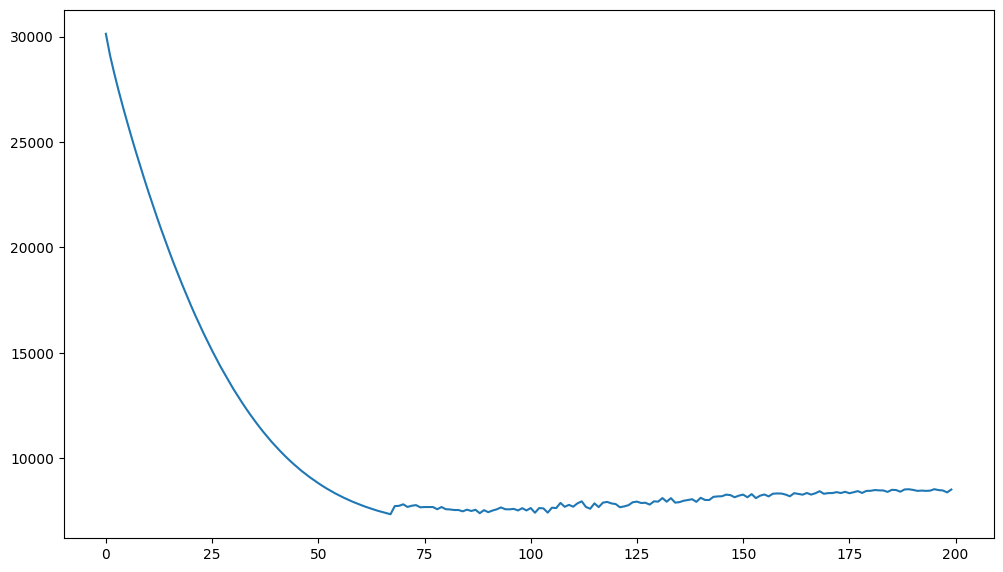

In [29]:
plt.figure(figsize=(12, 7), dpi=100)
plt.xlim = (0, len(test_losses))
plt.plot(list(range(len(test_losses))), test_losses)

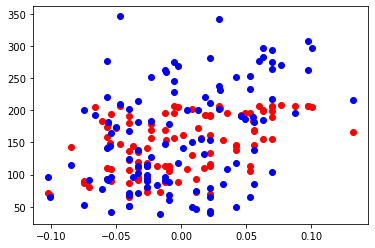

In [30]:
plt.scatter(X_test[:, 3], np.array(FCnet.forward(X_test).detach()), c = 'r')
plt.scatter(X_test[:, 3], np.array(y_test), c = 'b')

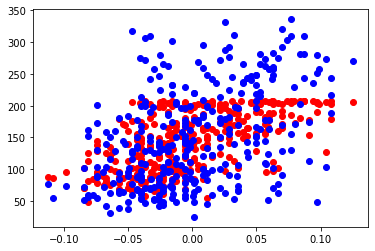

In [31]:
plt.scatter(X_train[:, 3], np.array(FCnet.forward(X_train).detach()), c = 'r')
plt.scatter(X_train[:, 3], np.array(y_train), c = 'b')

# nn4

In [32]:
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

In [33]:
seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [34]:
data_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [35]:
class MNISTdataset(Dataset):
    def __init__(self, digits_pd):
        self.digits_pd = digits_pd
        self.classes_outcome = pd.DataFrame(data = np.stack([np.arange(len(digits_pd)), digits_pd.iloc[:, 0].to_numpy()]).T, columns = ["Id", "Class"])
    
    def __len__(self):
        return len(self.classes_outcome)

    def __getitem__(self, index):
        label = torch.tensor(int(self.classes_outcome.iloc[index, 1]))
        image = torch.tensor(self.digits_pd.iloc[index, 1:].to_numpy(), dtype=torch.float32)
        return [image, label]

In [36]:
train_dataset = MNISTdataset(data_train)
test_dataset = MNISTdataset(data_test)

In [37]:
LEARNING_RATE = 0.001
BATCH_SIZE = 20
EPOCHS = 20
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [38]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# loss
CELoss = nn.CrossEntropyLoss()

In [39]:
model_MNIST = nn.Sequential(
    nn.Linear(784, 300),
    nn.ReLU(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 20),
    nn.ReLU(),
    nn.Linear(20, 10)
)

model_MNIST.to(device=device)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=10, bias=True)
)

In [40]:
optimizer = torch.optim.Adam(model_MNIST.parameters(), lr = LEARNING_RATE)

In [41]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0

    model.eval()
    
    with torch.no_grad():
        for data, targets in tqdm(loader):
            data = data.to(device)
            targets = targets.to(device)
            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum()
            num_samples += predictions.size(0)
        print("Correct: {}, Total: {}, Accuracy: {}".format(num_correct, num_samples, int(num_correct) / int(num_samples)))

    model.train()
    return (int(num_correct) / int(num_samples))

In [42]:
data, targets = next(iter(train_loader))

accuracy_test = []
for epoch in tqdm(range(EPOCHS)):
    losses = []
    with tqdm(total=len(train_loader)) as pbar:
        for batch_idx, (data, targets) in enumerate(train_loader):    
            optimizer.zero_grad()
            
            data = data.to(device=device)
            targets = targets.to(device=device)

            scores = model_MNIST(data)
            loss = CELoss(scores, targets)
            
            losses.append(loss)

            # backprop
            loss.backward()
            optimizer.step()

            pbar.update(1)
    
    print("Cost at epoch {} is {}".format(epoch, sum(losses) / len(losses)))
    t = check_accuracy(test_loader, model_MNIST)
    accuracy_test.append(t)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 0 is 0.44079941511154175


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9313, Total: 9999, Accuracy: 0.9313931393139314


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 1 is 0.18426451086997986


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9436, Total: 9999, Accuracy: 0.9436943694369437


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 2 is 0.14201654493808746


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9423, Total: 9999, Accuracy: 0.9423942394239424


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 3 is 0.11171644181013107


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9460, Total: 9999, Accuracy: 0.9460946094609461


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 4 is 0.09642021358013153


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9639, Total: 9999, Accuracy: 0.963996399639964


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 5 is 0.09063973277807236


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9411, Total: 9999, Accuracy: 0.9411941194119412


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 6 is 0.06954854726791382


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9593, Total: 9999, Accuracy: 0.9593959395939594


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 7 is 0.07267764210700989


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9551, Total: 9999, Accuracy: 0.9551955195519551


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 8 is 0.06477534025907516


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9564, Total: 9999, Accuracy: 0.9564956495649565


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 9 is 0.05470491573214531


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9625, Total: 9999, Accuracy: 0.9625962596259626


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 10 is 0.0478757843375206


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9670, Total: 9999, Accuracy: 0.9670967096709671


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 11 is 0.04801599681377411


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9640, Total: 9999, Accuracy: 0.9640964096409641


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 12 is 0.045946549624204636


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9584, Total: 9999, Accuracy: 0.9584958495849585


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 13 is 0.047344766557216644


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9670, Total: 9999, Accuracy: 0.9670967096709671


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 14 is 0.03783447667956352


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9661, Total: 9999, Accuracy: 0.9661966196619662


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 15 is 0.03698059916496277


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9590, Total: 9999, Accuracy: 0.9590959095909591


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 16 is 0.047331567853689194


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9672, Total: 9999, Accuracy: 0.9672967296729673


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 17 is 0.03127417340874672


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9659, Total: 9999, Accuracy: 0.965996599659966


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 18 is 0.03212449327111244


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9552, Total: 9999, Accuracy: 0.9552955295529553


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 19 is 0.03476651385426521


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9688, Total: 9999, Accuracy: 0.9688968896889689
